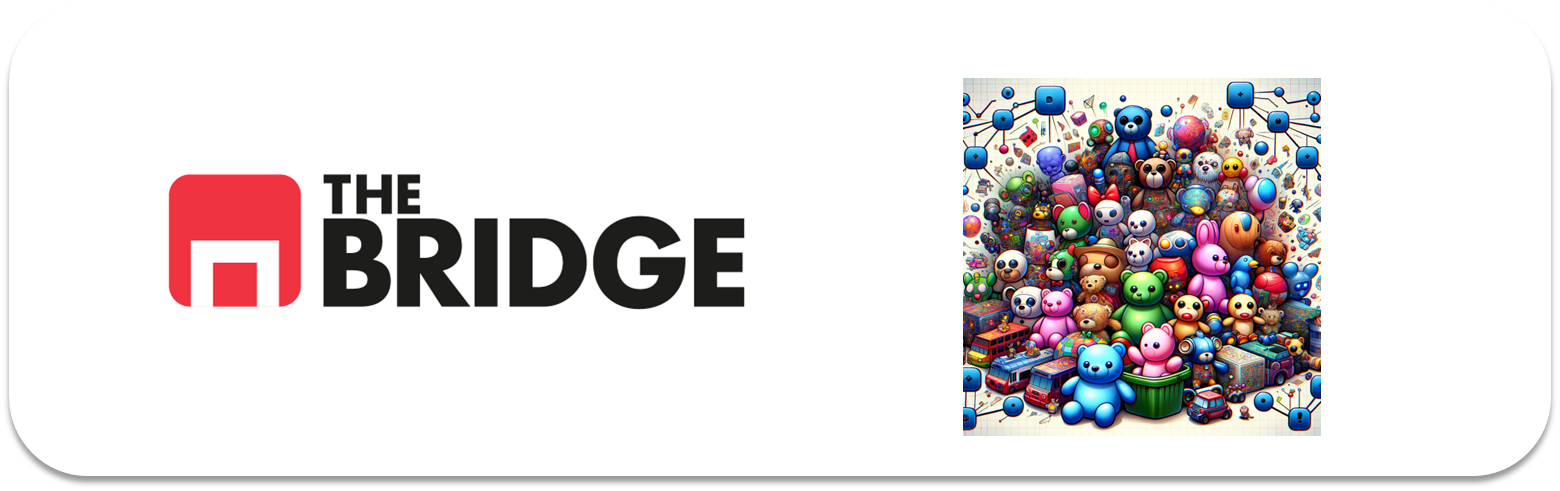

## PRACTICA OBLIGATORIA: **DBSCAN y Clustering Jerárquico**

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


In [5]:
df = pd.read_csv("empowering_drinks.csv", sep = "|")
df.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.518613,0.232053,1.034819,1.013009,0.251717
1,0.246290,-0.827996,0.733629,0.965242,-0.293321
2,0.196879,1.109334,1.215533,1.395148,0.269020
3,1.691550,0.487926,1.466525,2.334574,1.186068
4,0.295700,1.840403,0.663351,-0.037874,-0.319276


<Figure size 640x480 with 0 Axes>

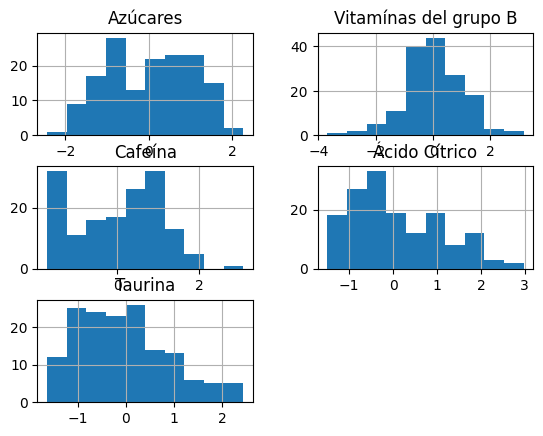

In [6]:
plt.figure()
df.hist()
plt.show()

<Figure size 2000x2000 with 0 Axes>

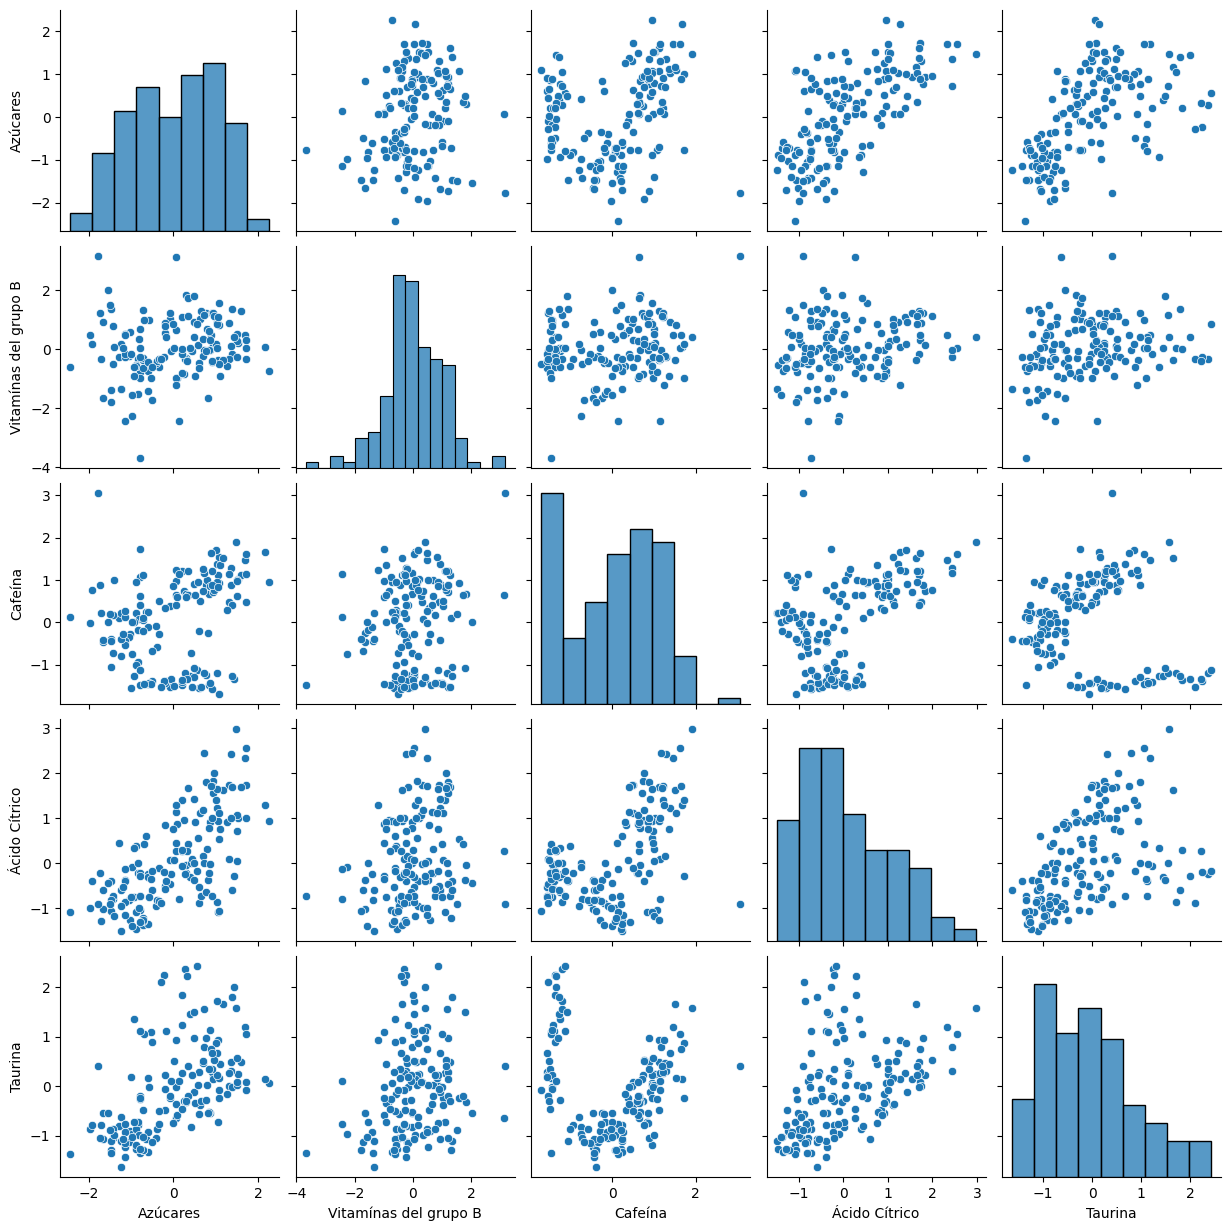

In [14]:
plt.figure(figsize = (20,20))
sns.pairplot(df)
plt.show()

In [15]:
#Aplicación KMeans con 3, 4 y 5 variables como k
from sklearn.cluster import KMeans

valores_k = [3, 4, 5]

for k in valores_k:
    
    print(f"\n{'='*50}")
    print(f"K-MEANS CON k={k}")
    print(f"{'='*50}")
    
    # Crear modelo con k clusters
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=101)
    
    # Entrenar y predecir (fit_predict hace ambas cosas)
    y_pred = kmeans.fit_predict(df) 
    
    # Mostrar resultados
    print(f"\nClusters asignados (primeros 10):")
    print(y_pred[:10])
    
    print(f"\nCentroides de los clusters:")
    print(kmeans.cluster_centers_)
    
    print(f"\nNúmero de muestras por cluster:")
    import numpy as np
    unique, counts = np.unique(y_pred, return_counts=True)
    for cluster, count in zip(unique, counts):
        print(f"  Cluster {cluster}: {count} muestras")
    
    print(f"\nInercia (menor = mejor): {kmeans.inertia_:.2f}")


K-MEANS CON k=3

Clusters asignados (primeros 10):
[1 1 1 1 1 1 1 1 1 1]

Centroides de los clusters:
[[-0.94744488 -0.44103437 -0.01830751 -0.69975456 -0.91249305]
 [ 0.87478392  0.41797074  1.0086812   1.10398662  0.20100175]
 [ 0.19342215  0.19028436 -1.38270045 -0.30276059  0.93300255]]

Número de muestras por cluster:
  Cluster 0: 58 muestras
  Cluster 1: 58 muestras
  Cluster 2: 37 muestras

Inercia (menor = mejor): 329.26

K-MEANS CON k=4

Clusters asignados (primeros 10):
[1 1 1 1 3 1 1 1 1 1]

Centroides de los clusters:
[[ 0.19342215  0.19028436 -1.38270045 -0.30276059  0.93300255]
 [ 0.97770902  0.23556729  1.00489303  1.25533665  0.25720716]
 [-0.80799466 -0.88750187 -0.06907748 -0.68810319 -0.91280178]
 [-0.96721115  1.17025671  0.38845562 -0.58302901 -0.73289483]]

Número de muestras por cluster:
  Cluster 0: 37 muestras
  Cluster 1: 52 muestras
  Cluster 2: 43 muestras
  Cluster 3: 21 muestras

Inercia (menor = mejor): 277.07

K-MEANS CON k=5

Clusters asignados (primer

In [16]:
# Modelo final con k=4
mejor_kmeans = KMeans(n_clusters=4, n_init=10, random_state=101)
clusters_kmeans = mejor_kmeans.fit_predict(df)

📊 K-MEANS CON k=3
1. Clusters asignados (primeros 10): [1 1 1 1 1 1 1 1 1]
¿Qué significa?

Las primeras 10 muestras (bebidas) fueron asignadas todas al cluster 1
Los números (0, 1, 2) son las etiquetas de los clusters
Cada bebida se asigna a UN solo cluster

2. Centroides de los clusters:
Cluster 0: [-0.947, -0.441, -0.018, -0.700, -0.912]
Cluster 1: [ 0.875,  0.418,  1.009,  1.104,  0.201]
Cluster 2: [ 0.193,  0.190, -1.383, -0.303,  0.933]
¿Qué significa?
Los centroides son las "bebidas promedio" de cada cluster. Cada número representa:

Posición 0: Azúcares
Posición 1: Vitaminas del grupo B
Posición 2: Cafeína
Posición 3: Ácido Cítrico
Posición 4: Taurina

Interpretación de cada cluster:
🔴 Cluster 0 (58 bebidas): Bebidas BAJAS en todo

Azúcares: -0.95 → MUY bajo
Vitaminas B: -0.44 → Bajo
Cafeína: -0.02 → Normal
Ácido Cítrico: -0.70 → Bajo
Taurina: -0.91 → MUY bajo

Tipo de bebida: "Suaves/Light" - poca cantidad de componentes

🟢 Cluster 1 (58 bebidas): Bebidas ALTAS en casi todo

Azúcares: 0.87 → Alto
Vitaminas B: 0.42 → Medio-alto
Cafeína: 1.01 → MUY alto 🔥
Ácido Cítrico: 1.10 → MUY alto
Taurina: 0.20 → Medio

Tipo de bebida: "Energéticas intensas" - mucha cafeína, azúcar, ácido

🔵 Cluster 2 (37 bebidas): Bebidas ESPECIALES

Azúcares: 0.19 → Medio
Vitaminas B: 0.19 → Medio
Cafeína: -1.38 → MUY bajo ⚠️ (¡ojo!)
Ácido Cítrico: -0.30 → Bajo
Taurina: 0.93 → MUY alto 🔥

Tipo de bebida: "Alta taurina, baja cafeína" - enfoque en taurina sin cafeína

3. Número de muestras por cluster

Cluster 0: 58 bebidas (38%)
Cluster 1: 58 bebidas (38%)
Cluster 2: 37 bebidas (24%)

Interpretación: Distribución relativamente equilibrada ✅ (ningún cluster tiene 90% ni 1%)

4. Inercia: 329.26
¿Qué significa?

Mide qué tan compactos están los clusters
Menor inercia = mejor (puntos más cerca de sus centroides)
Este número por sí solo no dice mucho, hay que compararlo con k=4 y k=5


📊 K-MEANS CON k=4
Inercia: 268.71
Comparación:

k=3: Inercia = 329.26
k=4: Inercia = 268.71 ⬇️ BAJÓ (mejor)

Interpretación: Con 4 clusters, las bebidas están más agrupadas (clusters más compactos)

📊 K-MEANS CON k=5
Inercia: 251.07
Comparación:

k=3: 329.26
k=4: 268.71
k=5: 251.07 ⬇️ BAJÓ más (aún mejor)

Pero ojo: También tienes un cluster con solo 13 muestras (cluster 3)

🎯 ¿CÓMO ELEGIR EL MEJOR k?
Método del codo:
k=3: 329.26  ⬇️ -60.55
k=4: 268.71  ⬇️ -17.64
k=5: 251.07
Observa:

De 3 a 4 → GRAN mejora (-60 puntos)
De 4 a 5 → Mejora pequeña (-17 puntos)

El "codo" está en k=4 🎯

Varianza explicada en 2D: 70.19%


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


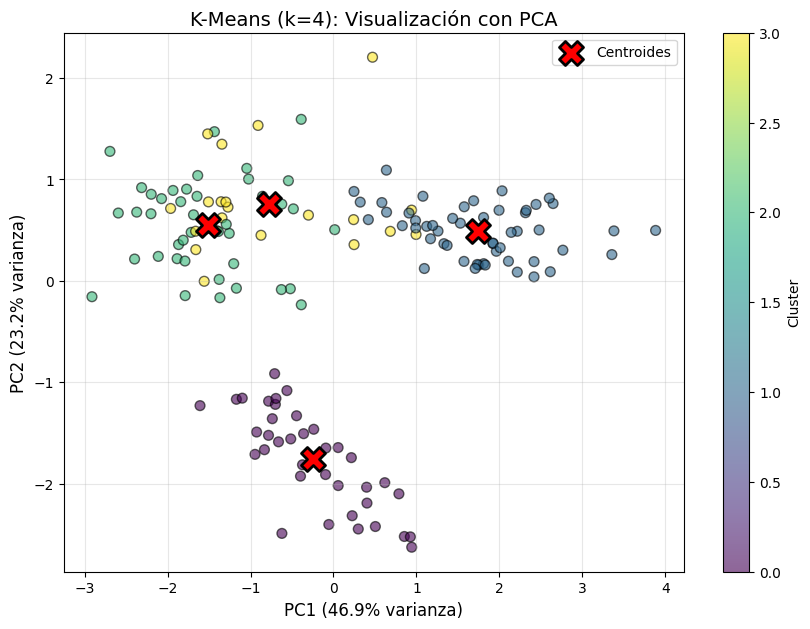

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir a 2D SOLO para visualizar (no para entrenar)
pca_visual = PCA(n_components=2)
df_2d = pca_visual.fit_transform(df)

print(f"Varianza explicada en 2D: {pca_visual.explained_variance_ratio_.sum():.2%}")

# Graficar
plt.figure(figsize=(10, 7))

scatter = plt.scatter(
    df_2d[:, 0],           # Componente principal 1
    df_2d[:, 1],           # Componente principal 2
    c=clusters_kmeans,     # Color por cluster
    cmap='viridis',
    s=50,
    alpha=0.6,
    edgecolors='black'
)

# Centroides en 2D también
centroides_2d = pca_visual.transform(mejor_kmeans.cluster_centers_)
plt.scatter(
    centroides_2d[:, 0],
    centroides_2d[:, 1],
    c='red',
    marker='X',
    s=300,
    edgecolors='black',
    linewidths=2,
    label='Centroides'
)

plt.xlabel(f'PC1 ({pca_visual.explained_variance_ratio_[0]:.1%} varianza)', fontsize=12)
plt.ylabel(f'PC2 ({pca_visual.explained_variance_ratio_[1]:.1%} varianza)', fontsize=12)
plt.title('K-Means (k=4): Visualización con PCA', fontsize=14)
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

ValueError: No objects to concatenate

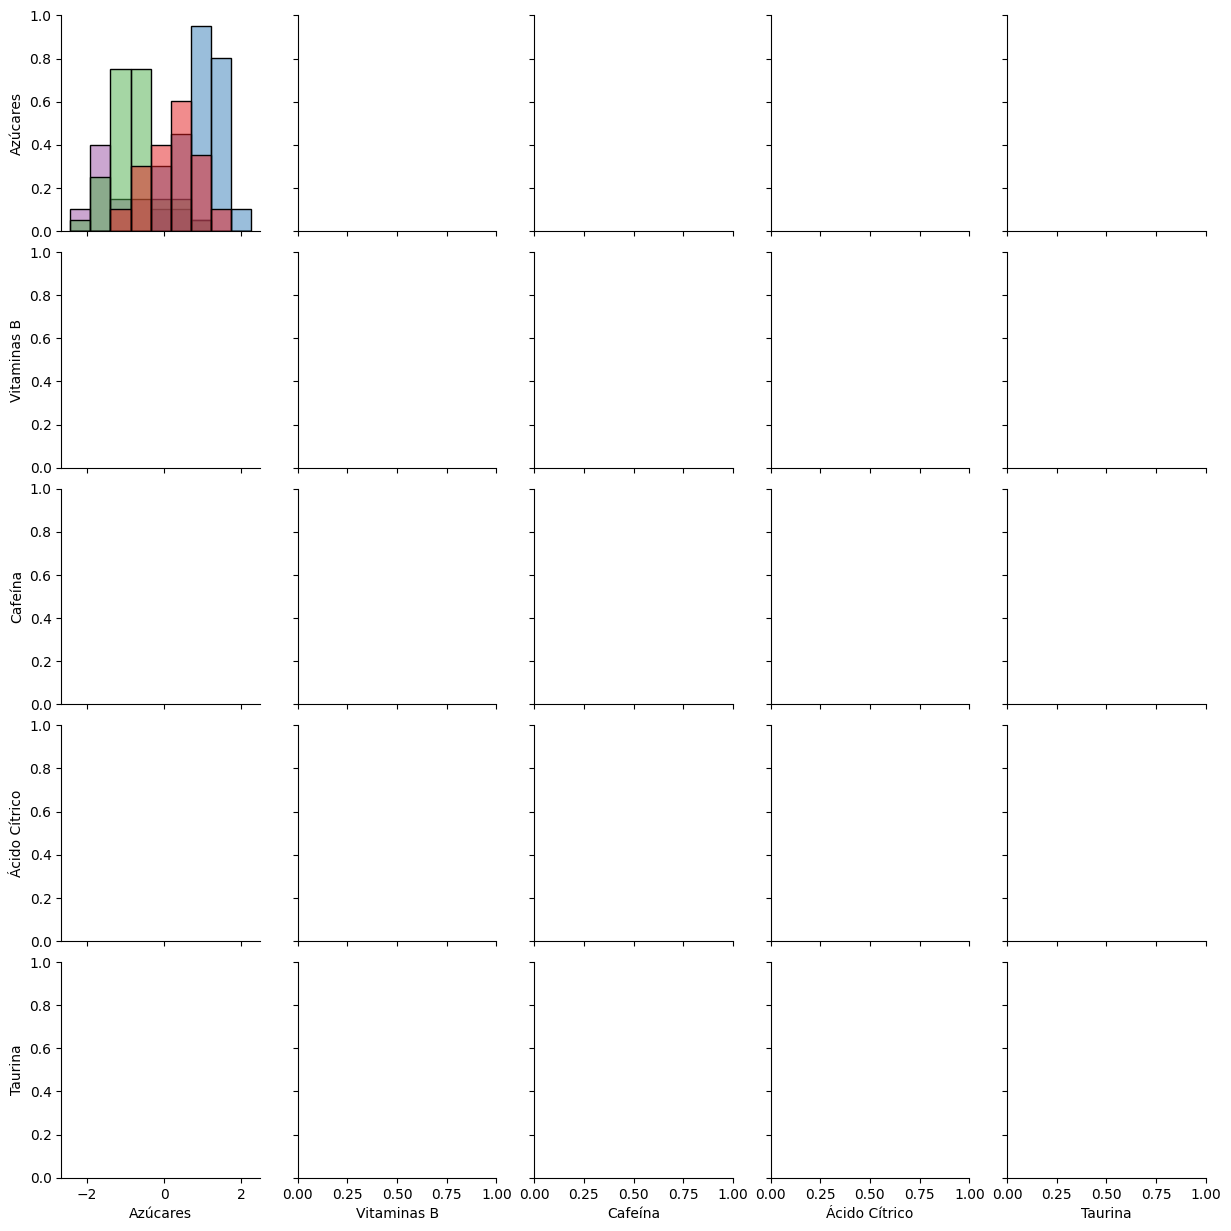

In [22]:
import seaborn as sns
import pandas as pd

# Crear DataFrame con datos y clusters
df_visual = pd.DataFrame(
    df,
    columns=['Azúcares', 'Vitaminas B', 'Cafeína', 'Ácido Cítrico', 'Taurina']
)
df_visual['Cluster'] = clusters_kmeans

# Pairplot coloreado por cluster
sns.pairplot(
    df_visual,
    hue='Cluster',           # Colorear por cluster
    palette='Set1',          # Paleta de colores
    plot_kws={'alpha': 0.6}, # Transparencia
    diag_kind='hist'         # Histogramas en diagonal
)
plt.suptitle('K-Means (k=4): Todas las features por cluster', y=1.01)
plt.show()

Clusters asignados: [1 1 1 1 0 1 1 1 1 1]
Total de muestras: 153

DataFrame con clusters:
   Azúcares  Vitaminas B   Cafeína  Ácido Cítrico   Taurina  Cluster
0  1.465925     0.196207  0.957824       0.927289  0.317612        1
1  0.221992    -0.871612  0.667526       0.879813 -0.267608        1
2  0.173684     1.079919  1.132002       1.307094  0.336190        1
3  1.635003     0.453956  1.373917       2.240782  1.320844        1
4  0.270301     1.816346  0.599790      -0.117176 -0.295475        0


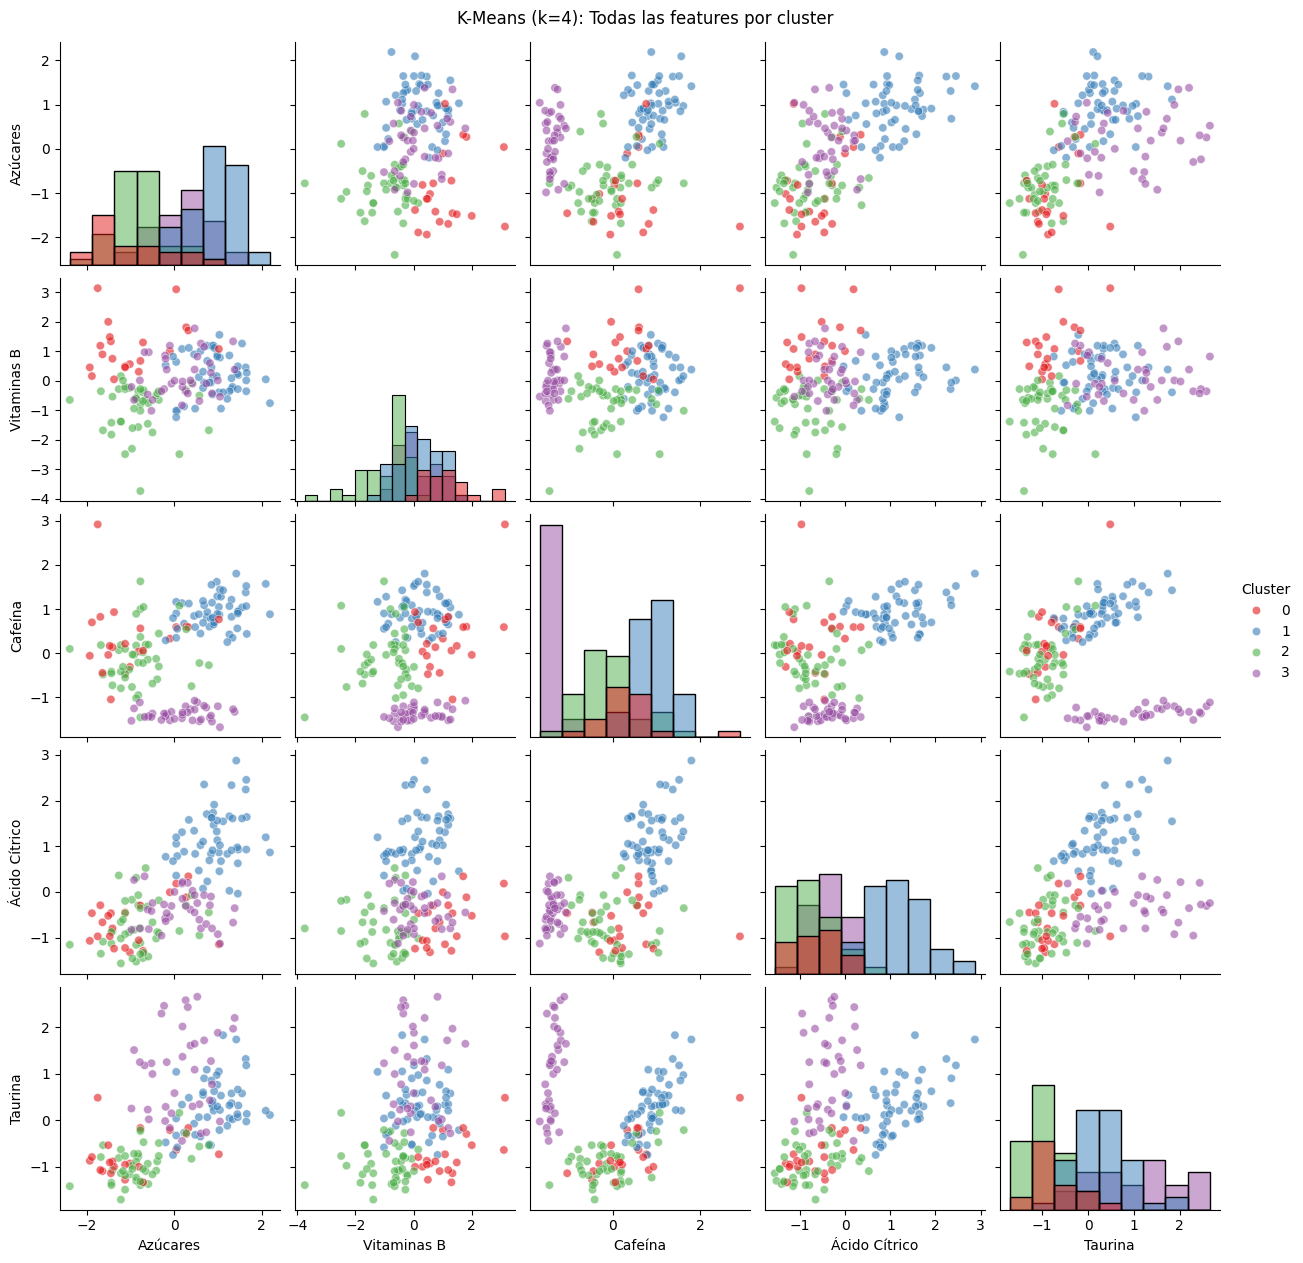

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# ============================================
# PASO 1: ENTRENAR K-MEANS CON k=4
# ============================================

mejor_kmeans = KMeans(n_clusters=4, n_init=10, random_state=101)
clusters_kmeans = mejor_kmeans.fit_predict(df_scaled)

print(f"Clusters asignados: {clusters_kmeans[:10]}")
print(f"Total de muestras: {len(clusters_kmeans)}")

# ============================================
# PASO 2: CREAR DATAFRAME PARA VISUALIZAR
# ============================================

df_visual = pd.DataFrame(
    df_scaled,
    columns=['Azúcares', 'Vitaminas B', 'Cafeína', 'Ácido Cítrico', 'Taurina']
)
df_visual['Cluster'] = clusters_kmeans

print("\nDataFrame con clusters:")
print(df_visual.head())

# ============================================
# PASO 3: PAIRPLOT COLOREADO POR CLUSTER
# ============================================

sns.pairplot(
    df_visual,
    hue='Cluster',           # Colorear por cluster
    palette='Set1',          # Paleta de colores
    plot_kws={'alpha': 0.6}, # Transparencia
    diag_kind='hist'         # Histogramas en diagonal
)
plt.suptitle('K-Means (k=4): Todas las features por cluster', y=1.01)
plt.show()

In [27]:
#Aplicación con DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN (eps=1, min_samples=5) #min simple es numero de vecinos para ser cluster. Y cuanto mayor sea el eps , se forman menos clusters.
dbscan.fit(df)
# El algoritmo
print(dbscan)
# Todos los datos etiquetados
print(len(dbscan.labels_))
# Los 10 primeros labels
print(dbscan.labels_[:10])
# Cuantos clusters ha montado
print(np.unique(dbscan.labels_))
#Para ver los índices:
print(len(dbscan.core_sample_indices_))
print(dbscan.core_sample_indices_[:10])


DBSCAN(eps=1)
153
[ 0  0  0 -1  0  0  0  0  0 -1]
[-1  0  1  2]
85
[ 0  2  5  6  8 10 11 14 15 16]


In [29]:
import numpy as np

# Clusters con eps=1
dbscan = DBSCAN(eps=1, min_samples=5)
clusters_dbscan = dbscan.fit_predict(df_scaled)

print("="*50)
print("DBSCAN con eps=1 - ANÁLISIS COMPLETO")
print("="*50)

# Contar por cluster
clusters_unicos = np.unique(clusters_dbscan)
n_clusters = len(clusters_unicos[clusters_unicos != -1])
n_ruido = np.sum(clusters_dbscan == -1)

print(f"\nClusters encontrados: {n_clusters}")
print(f"Ruido: {n_ruido}/{len(clusters_dbscan)} ({n_ruido/len(clusters_dbscan)*100:.1f}%)")

print("\nDistribución por cluster:")
for cluster in clusters_unicos:
    count = np.sum(clusters_dbscan == cluster)
    porcentaje = (count/len(clusters_dbscan))*100
    
    if cluster == -1:
        print(f"  ❌ Ruido: {count} bebidas ({porcentaje:.1f}%)")
    else:
        print(f"  ✅ Cluster {cluster}: {count} bebidas ({porcentaje:.1f}%)")

DBSCAN con eps=1 - ANÁLISIS COMPLETO

Clusters encontrados: 3
Ruido: 33/153 (21.6%)

Distribución por cluster:
  ❌ Ruido: 33 bebidas (21.6%)
  ✅ Cluster 0: 49 bebidas (32.0%)
  ✅ Cluster 1: 41 bebidas (26.8%)
  ✅ Cluster 2: 30 bebidas (19.6%)


### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [32]:
df_nuevo = pd.read_csv("new_experiments.csv", sep = "|")
df_nuevo.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.481555,0.305159,1.366128,2.239039,0.731870
1,0.616869,0.890014,0.583034,0.312420,-0.665332
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583


In [34]:
# ============================================
# IMPORTS NECESARIOS PARA TODO EL EJERCICIO
# ============================================

# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento
from sklearn.preprocessing import StandardScaler

# Reducción de dimensionalidad
from sklearn.decomposition import PCA

# Algoritmos de clustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Métricas de evaluación
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# Para calcular distancias (opcional, para relación entre clusters)
from scipy.spatial.distance import cdist

# Para encontrar vecinos (método k-distance en DBSCAN)
from sklearn.neighbors import NearestNeighbors

In [37]:
#Aplicación del nuevo df prediciendo a través de kmeans
clusters_nuevos = mejor_kmeans.predict(df_nuevo)
print(clusters_nuevos)


[1 1 0 2 3 3]


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [38]:
#Añadir los nuevos clusters al dataframe
# Añadir la columna de clusters
df_nuevo['Cluster_Asignado'] = clusters_nuevos

# Mostrar los resultados
print("="*60)
print("NUEVOS EXPERIMENTOS CLASIFICADOS")
print("="*60)
print(df_nuevo)

NUEVOS EXPERIMENTOS CLASIFICADOS
   Azúcares  Vitamínas del grupo B   Cafeína  Ácido Cítrico   Taurina  \
0  1.481555               0.305159  1.366128       2.239039  0.731870   
1  0.616869               0.890014  0.583034       0.312420 -0.665332   
2 -1.680724               0.341713 -0.340615      -0.213021 -0.976782   
3 -0.284874              -1.412851 -0.782361      -1.193845 -0.717240   
4 -0.927212               0.634140 -1.565455      -0.085641 -0.522583   
5  0.962743              -0.243142 -1.354622      -0.420013  1.956043   

   Cluster_Asignado  
0                 1  
1                 1  
2                 0  
3                 2  
4                 3  
5                 3  


In [39]:
df_nuevo.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,Cluster_Asignado
0,1.481555,0.305159,1.366128,2.239039,0.731870,1
1,0.616869,0.890014,0.583034,0.312420,-0.665332,1
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782,0
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240,2
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583,3


In [40]:
# Ver a qué cluster pertenece cada nuevo experimento
print("\nRESUMEN DE CLASIFICACIÓN:")
print(f"Cluster 0: {np.sum(clusters_nuevos == 0)} experimentos")
print(f"Cluster 1: {np.sum(clusters_nuevos == 1)} experimentos")
print(f"Cluster 2: {np.sum(clusters_nuevos == 2)} experimentos")
print(f"Cluster 3: {np.sum(clusters_nuevos == 3)} experimentos")

# Mostrar características de cada cluster (recuerda los centroides)
print("\nCARACTERÍSTICAS DE CADA CLUSTER:")
centroides_df = pd.DataFrame(
    mejor_kmeans.cluster_centers_,
    columns=['Azúcares', 'Vitaminas B', 'Cafeína', 'Ácido Cítrico', 'Taurina']
)
print(centroides_df)


RESUMEN DE CLASIFICACIÓN:
Cluster 0: 1 experimentos
Cluster 1: 2 experimentos
Cluster 2: 1 experimentos
Cluster 3: 2 experimentos

CARACTERÍSTICAS DE CADA CLUSTER:
   Azúcares  Vitaminas B   Cafeína  Ácido Cítrico   Taurina
0 -0.964431     1.141288  0.334835      -0.659001 -0.739587
1  0.937091     0.199747  0.928980       1.168136  0.323507
2 -0.808767    -0.931554 -0.106152      -0.763433 -0.932757
3  0.170305     0.154133 -1.372269      -0.380444  1.049122


### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.

In [42]:
# ============================================
# CARGAR ETIQUETAS REALES DE ENERGIZACIÓN
# ============================================

# Busca el archivo en el directorio data
# Probablemente se llama algo como: "energy_labels.csv" o "ground_truth.csv"
# Ajusta el nombre según corresponda

df_labels = pd.read_csv("power_results.csv", sep=";")  # Ajusta nombre y sep
print("Etiquetas reales cargadas:")
print(df_labels.head())
print(f"\nShape: {df_labels.shape}")

Etiquetas reales cargadas:
   class
0      1
1      1
2      1
3      1
4      1

Shape: (159, 1)


In [43]:
df_labels.head()

,class
0,1
1,1
2,1
3,1
4,1
